In [9]:
# netowrks
import networkx as nx
import igraph as ig
from scipy import sparse

# data processing
import pandas as pd
import polars as pl
import numpy as np
import scipy.sparse as ss
import polars.selectors as cs



#some functions to make our lifes easier
import sys
sys.path.append("./")
from common_functions import *

# viz
import pylab as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

#Change the default options of visualization (improving the defaults)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette,  font_scale=1.3, color_codes=True,
rc=custom_params)

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Create example networks and visualize them
- Node the create_using parameter

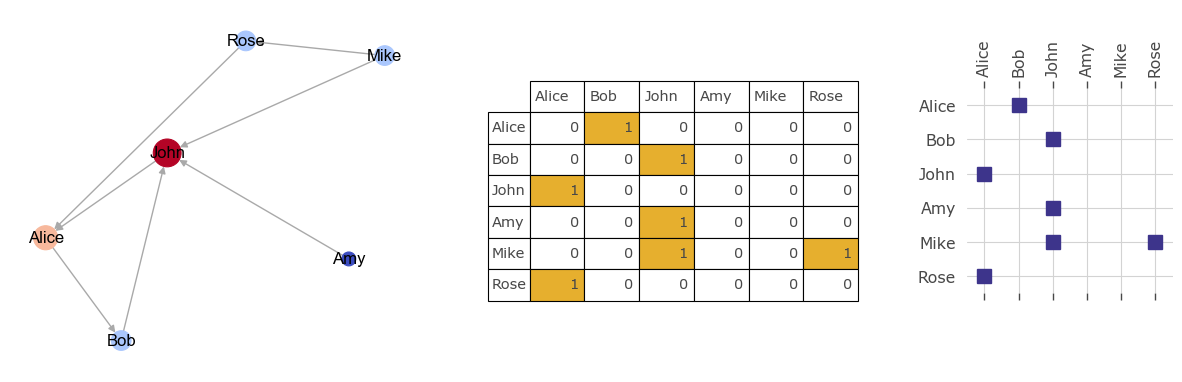

In [10]:
# Small directed network to understand matrix multiplication
G_dir = nx.from_edgelist([
    ("Alice", "Bob"),
    ("John", "Alice"),
    ("Bob", "John"),
    ("Amy", "John"),
    ("Mike", "John"),
    ("Rose", "Alice"),
    ("Mike", "Rose")
], create_using=nx.DiGraph())

#This function is defined in common_functions
plot_network_adj(G_dir)



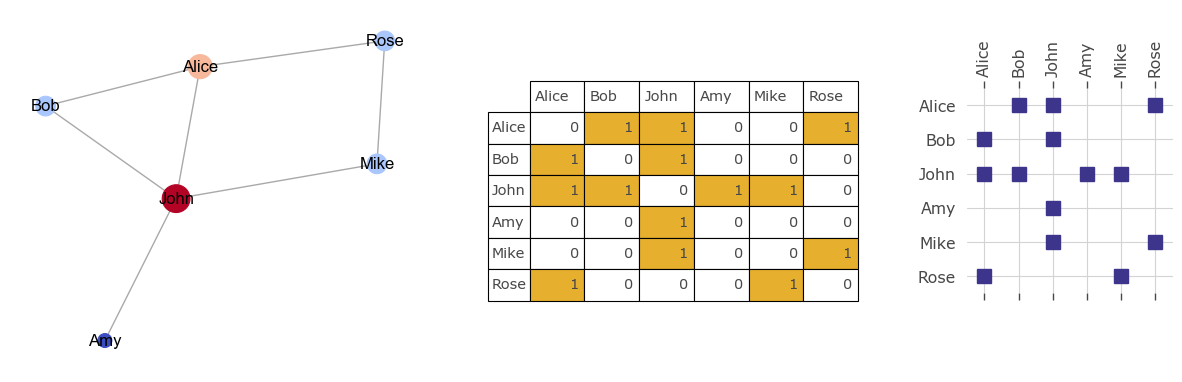

In [11]:

# Small undirected network
G_undir = nx.from_edgelist([
    ("Alice", "Bob"),
    ("John", "Alice"),
    ("Bob", "John"),
    ("Amy", "John"),
    ("Mike", "John"),
    ("Rose", "Alice"),
    ("Mike", "Rose")
], create_using=nx.Graph())


plot_network_adj(G_undir)

In [5]:
# Create some metadata
df = pd.DataFrame([["Alice",2],
                  ["Bob",0],
                  ["John",2],
                  ["Amy",0],
                  ["Mike",1],
                  ["Rose",5]], columns=["person","children"])

df

,person,children
0,Alice,2
1,Bob,0
2,John,2
3,Amy,0
4,Mike,1
5,Rose,5


# Exercise 1



## 1.1 Convert the directed network 
- numpy_array
- scipy_sparse_array
- pandas_adjacency
- pandas_edgelist

What are the advantages of each?


In [194]:
#Example: 
A = nx.to_scipy_sparse_array(G_dir, nodelist=list(G_dir.nodes()), weight=1)
A

<6x6 sparse array of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

### 1.2 Use plt.spy() to visualize the scipy_sparse_array

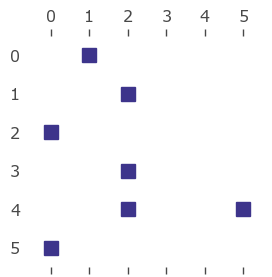

In [195]:
plt.spy(A)

## 1.3 Create a network object from a pandas edgelist

In [196]:
# First creating the pandas edgelist
df_edg = nx.to_pandas_edgelist(G_dir, nodelist=list(G_dir.nodes()))
df_edg.head()

,source,target
0,Alice,Bob
1,Bob,John
2,John,Alice
3,Amy,John
4,Mike,John


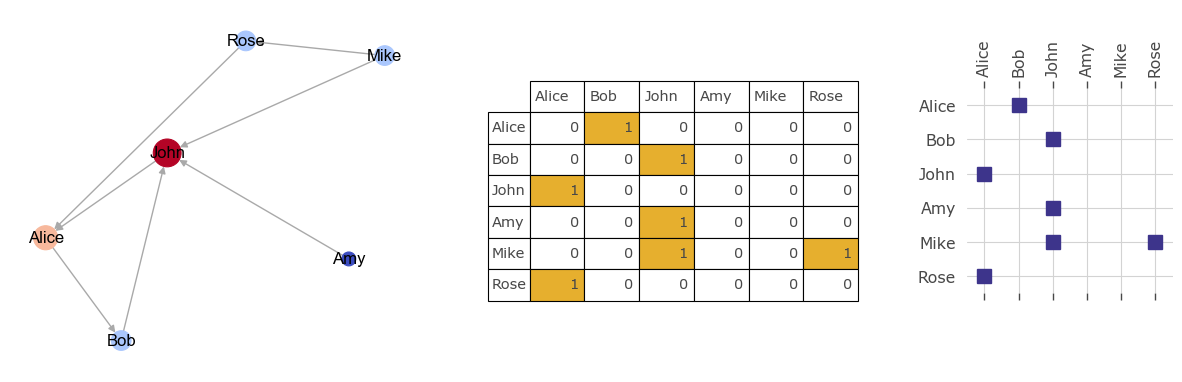

In [197]:
# Convert to graph
G = ...

## If you were converting from a matrix/array, you'd need to add the names back
# d_names = {i: node for i,node in enumerate(G_dir.nodes())}
# G = nx.relabel_nodes(G, d_names) #add back labels (lost during the conversion)
plot_network_adj(G)


# Exercise 2
What is the average number of children of your friends?

In python
* Matrix multiplication (dot-product) is done using "@" (e.g. A @ B)
    * The number of columns of A needs to match the number of rows of B!
* Element-wise multiplication is done using "*" (e.g. A*B multiplies the element i,j of A with the element i,j of B)
    * If B is an array, the dimensions need to match those of A
    * If B is a vector, it multiplies it row-wise (the number of rows of A need to match the number of elements of B)

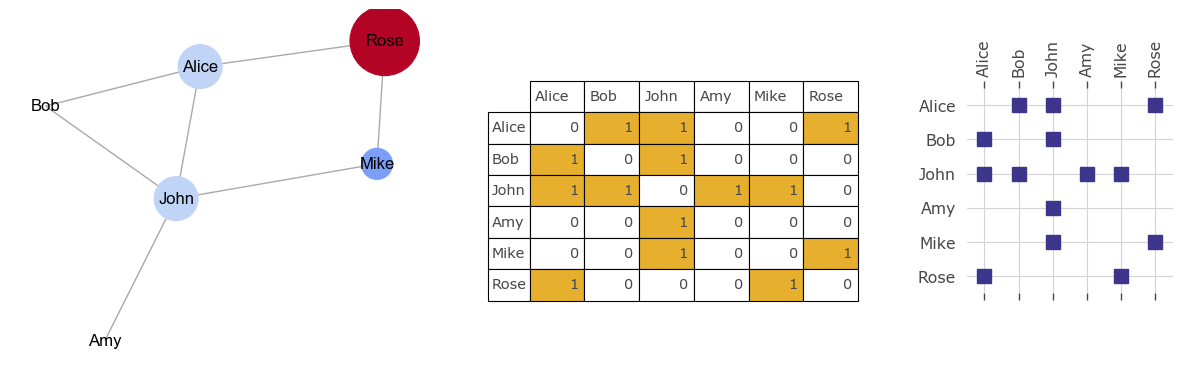

In [198]:
# Original network adding the children as a color/size
plot_network_adj(G_undir, values = df["children"])

[7 4 3 2 7 3]


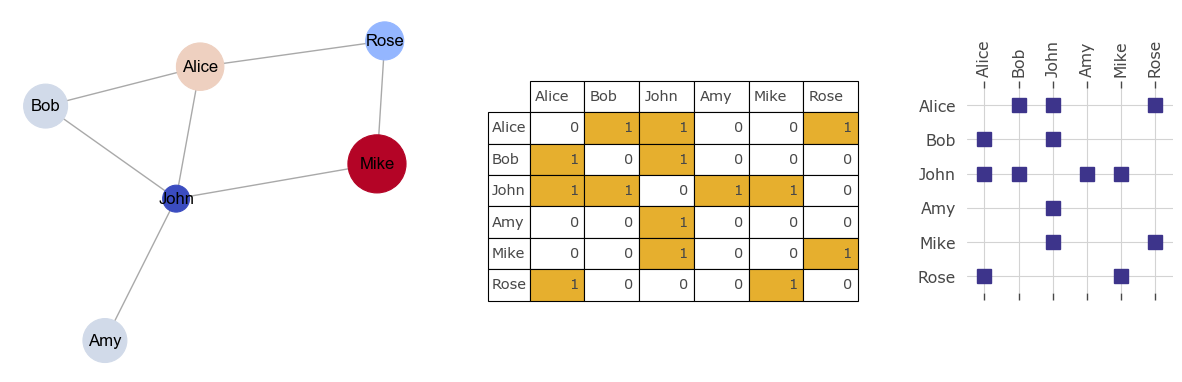

In [200]:
# craete the adjacency array
A = nx.to_scipy_sparse_array(G_undir)

# Calculate sum of neighbors children
sum_children = ...

# Divide by number of neighbors to get an average
avg_children = ...

print(sum_children)
plot_network_adj(G_undir, values=avg_children)

# Exercise 3: Matrix multiplication
3a. Interpretation as number of routes
- Number of nodes 2 steps away
- Number of nodes 3 steps away
- Number of triangles directed
- Number of triangles undirected

3b. Number of triangles and clustering

## Exercise 3a: Matrix multiplication and paths

One step away
Two steps away
Three steps away. Triangles!


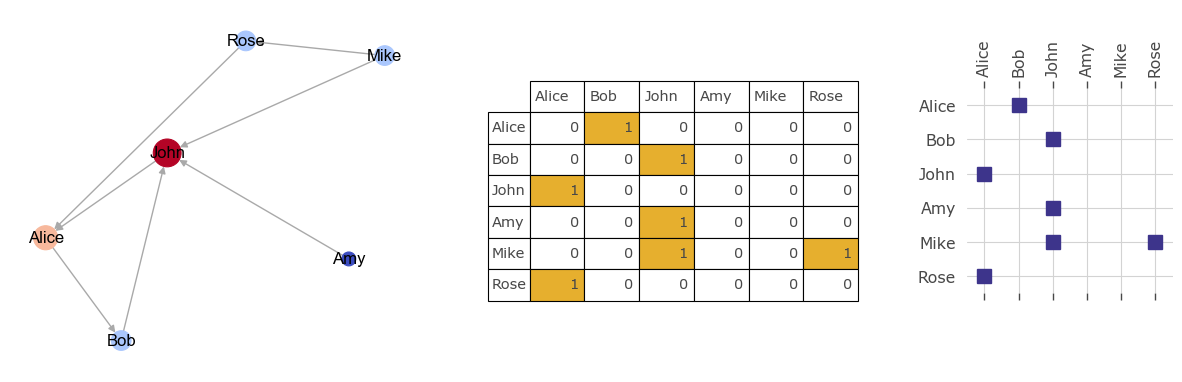

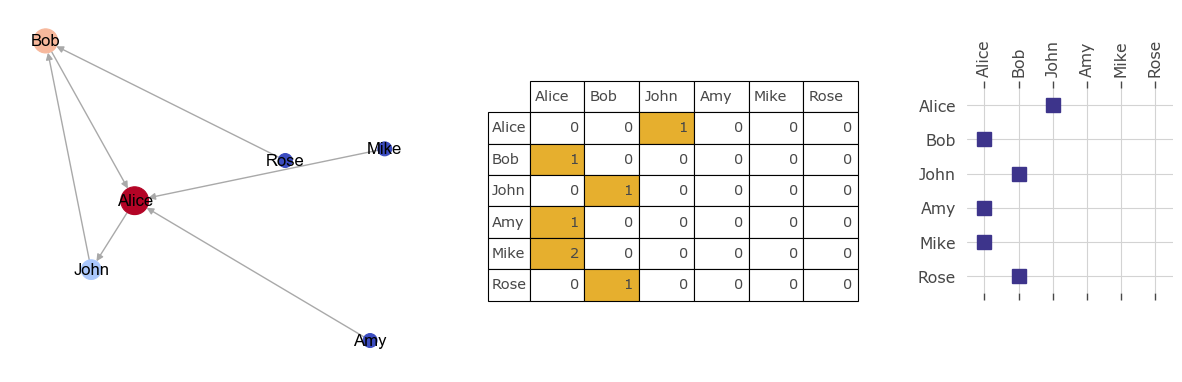

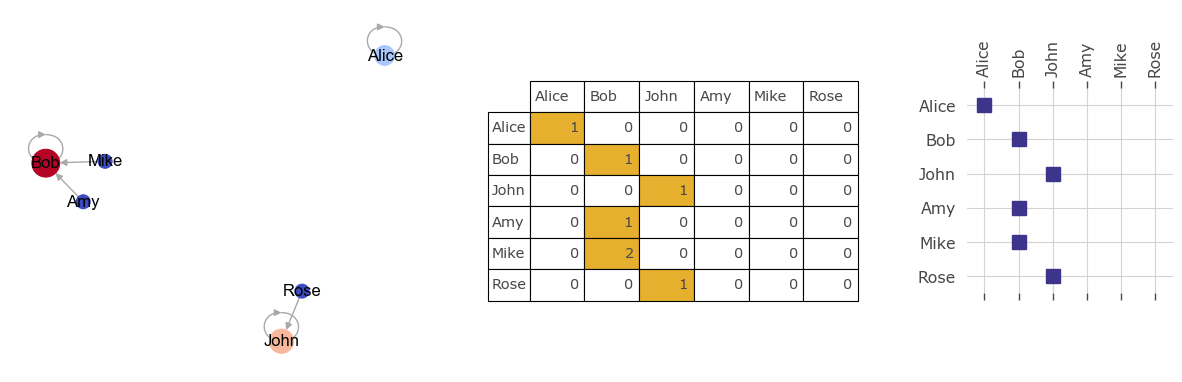

In [7]:
# Number of paths to go from node i to node j in x steps

#x = 1
print("One step away")
plot_network_adj(G_dir)
A = nx.to_scipy_sparse_array(G_dir)

#x = 2
print("Two steps away")
G2 = adj_to_net(A @ A) #A**2
plot_network_adj(G2)

#x = 3
print("Three steps away. Triangles!")
G3 = adj_to_net(A @ A @ A) #A**3
plot_network_adj(G3)



## How many nodes are 3 steps away?

In [8]:
...

/Users/garci061/miniforge3/envs/networks/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


array([2, 2, 2, 3, 4, 3])

## Exercise 3b: Number of triangles and clustering (skip, but you can check the solutions and ask questions)

[('Alice', 1), ('Bob', 1), ('John', 1), ('Amy', 0), ('Mike', 0), ('Rose', 0)]

1.0


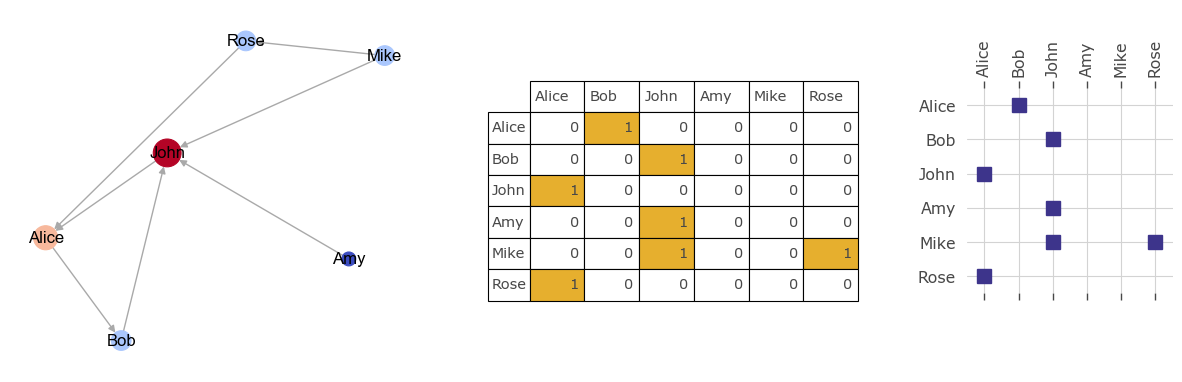

In [204]:
# Count number of triangles in the directed network
plot_network_adj(G_dir)
A = nx.to_scipy_sparse_array(G_dir)
path_3 = A@A@A

# For undirected newtorks there are two directions, for directed networks one
display(list(zip(G_dir.nodes(), path_3.diagonal() )))

# Number of triangles = trace / 3 (each  triangle count in 3 nodes)
print(path_3.trace()/3)

[('Alice', 1.0),
 ('Bob', 1.0),
 ('John', 1.0),
 ('Amy', 0.0),
 ('Mike', 0.0),
 ('Rose', 0.0)]

1.0


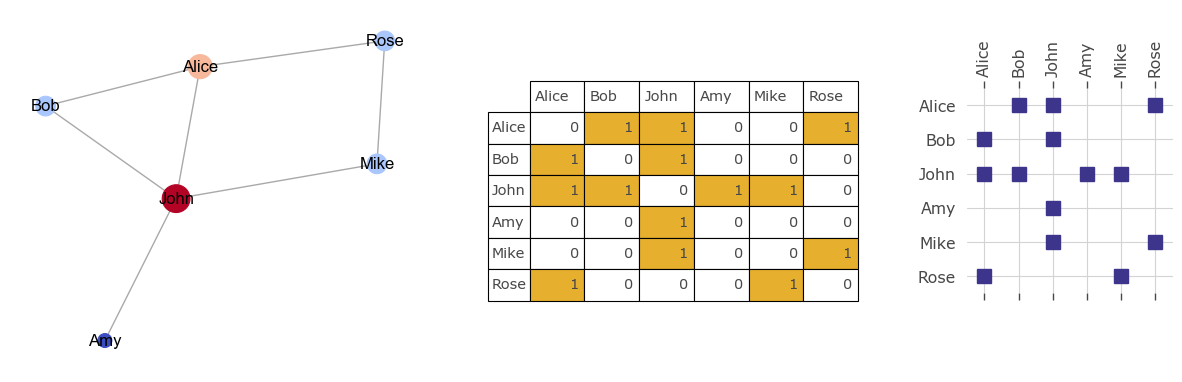

In [205]:
# Count number of triangles in the undirected network
plot_network_adj(G_undir)
A = nx.to_scipy_sparse_array(G_undir)
path_3 = A@A@A


# For undirected newtorks there are two directions
display(list(zip(G_undir.nodes(), path_3.diagonal() / 2)))

# Number of triangles = trace / 6 (each  triangle count in 3 nodes, each triangle counted in two directions)
print(path_3.trace()/3/2)

In [206]:
#Number of unique people reached in 3 steps (example)
number_people = A@A@A + A@A
number_people.setdiag(0) # Remove yourself (in the diagonal)
number_people = number_people>0 #Don't count people many times

number_people.sum(1)

array([5, 5, 5, 5, 5, 5])

In [207]:
#Local clustering = number of triangles / number of potential links
print(nx.clustering(G_undir)) #standard nx function

# Number of triangles
path_3 = (A@A@A).diagonal()/2 # divided by two because there are two directions

# Number of potential links between neighbors
degree = A.sum(1)
potential_links = (degree*(degree-1)/2)

list(zip(G_undir.nodes(), path_3, potential_links, path_3/potential_links))

{'Alice': 0.3333333333333333, 'Bob': 1.0, 'John': 0.16666666666666666, 'Amy': 0, 'Mike': 0, 'Rose': 0}


/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_5073/2639672817.py:11: RuntimeWarning: invalid value encountered in true_divide
  list(zip(G_undir.nodes(), path_3, potential_links, path_3/potential_links))


[('Alice', 1.0, 3.0, 0.3333333333333333),
 ('Bob', 1.0, 1.0, 1.0),
 ('John', 1.0, 6.0, 0.16666666666666666),
 ('Amy', 0.0, 0.0, nan),
 ('Mike', 0.0, 1.0, 0.0),
 ('Rose', 0.0, 1.0, 0.0)]

---

# Exercise 4
Project affiliation networks


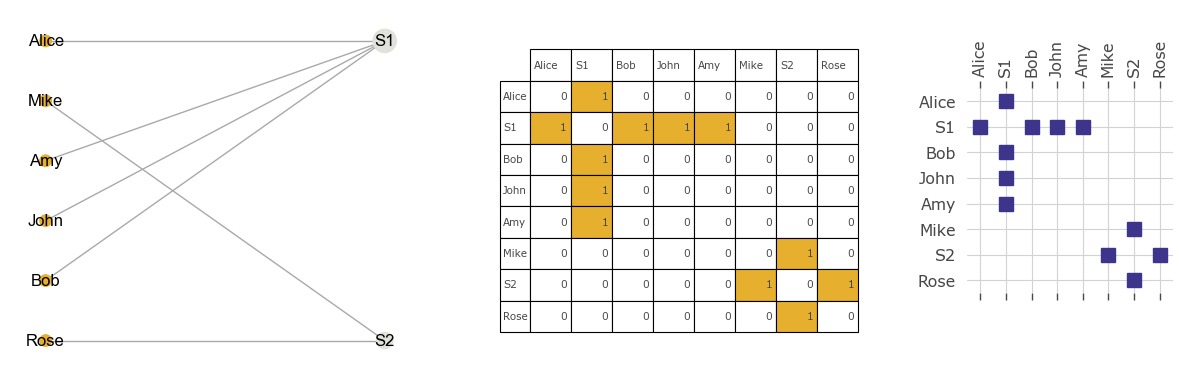

In [208]:
G_bip = nx.from_edgelist([
  ["Alice","S1"],
  ["Bob","S1"],
  ["John","S1"],
  ["Amy","S1"],
  ["Mike","S2"],
  ["Rose","S2"]
], create_using=nx.Graph())

plot_network_adj(G_bip)

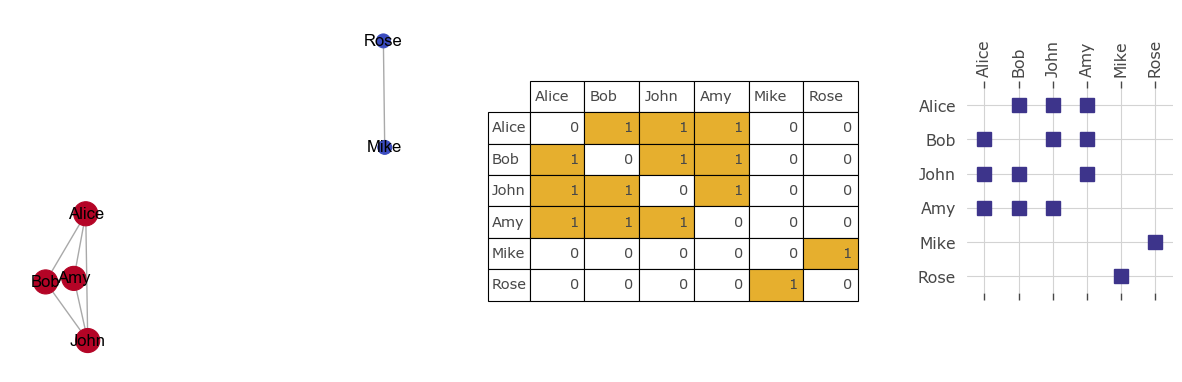

In [209]:
# Project (easy option)
G_proj = nx.bipartite.projected_graph(G_bip, ["Alice","Bob","John","Amy","Mike","Rose"])
plot_network_adj(G_proj)

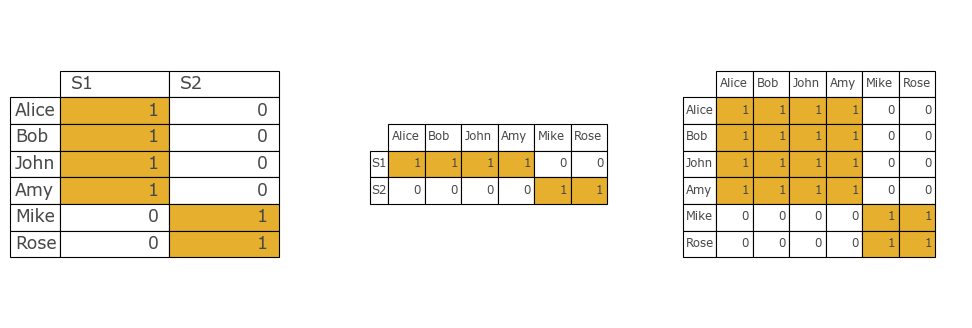

In [211]:
# Extract the two submatrixes
A = nx.to_scipy_sparse_array(G_bip, nodelist=["Alice","Bob","John","Amy","Mike","Rose","S1","S2"])

A_people = A[:6,:][:,-2:]
A_school = A_people.T

plt.figure(figsize=(12,4))
a1 = plt.subplot(131)
plot_table(a1, A_people.todense(), ["Alice","Bob","John","Amy","Mike","Rose"], ["S1","S2"])
a2 = plt.subplot(132)
plot_table(a2, A_school.todense(),  ["S1","S2"], ["Alice","Bob","John","Amy","Mike","Rose"])
a3 = plt.subplot(133)
plot_table(a3, (A_people @ A_school).todense(),  ["Alice","Bob","John","Amy","Mike","Rose"], ["Alice","Bob","John","Amy","Mike","Rose"])


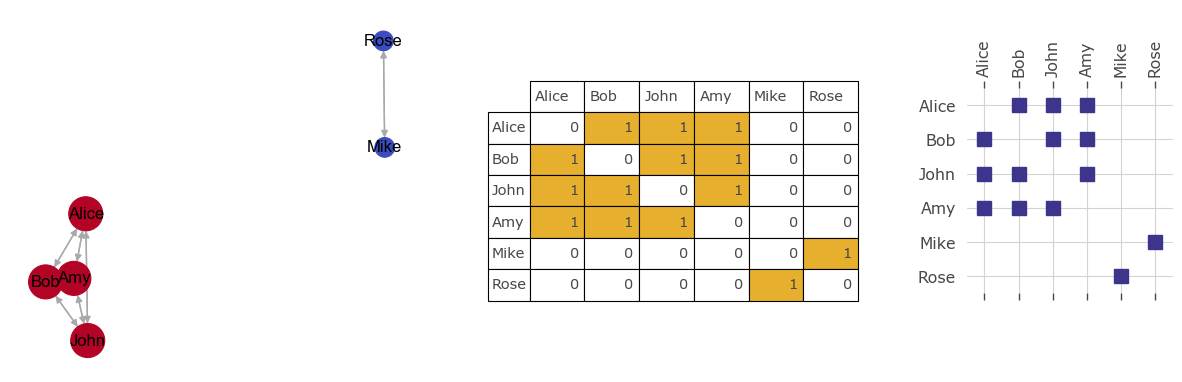

In [212]:
# Proyect via multiplication
G_proj = adj_to_net(A_people @ A_school)
G_proj.remove_edges_from(nx.selfloop_edges(G_proj))


plot_network_adj(G_proj)

In [220]:
df

,person,children
0,Alice,2
1,Bob,0
2,John,2
3,Amy,0
4,Mike,1
5,Rose,5


In [218]:
## Homophilic? 

# global value
nx.set_node_attributes(G_proj, df.set_index("person")["children"].to_dict(), "children")
global_assort = nx.assortativity.numeric_assortativity_coefficient(G_proj, "children")
print(global_assort)

# local, defined in common_functions (based on Peel et al 2018)
local_assort = calculate_local_assort(G_proj, df["children"])
print(np.round(local_assort,3))

-0.19148936170212763
[-0.016  0.026 -0.016  0.026 -0.232 -0.232]


# Exercise 5
Based on the arrays below 
- Calculate the share of your neighbors' families with children
- Calculate the number of children born within two degrees of you in the last two years (2018&1019)


In [188]:
#remove a warning, we barely change the sparsity
import warnings
warnings.filterwarnings("ignore", message="Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.")

# function to generate data
def create_random_network(groups=100):
    """
    Creates a regular random network (every node has the same degree, excluding self-edges)
    """
    names = np.arange(N)
    np.random.shuffle(names)
    groups = names%groups
    df = pl.from_records([names, groups], schema=["RINPERSOONSRC", "group"], orient="col")
    df2 = df.clone()
    df2.columns = ["RINPERSOONDST", "group"]
    df = df.join(df2, on='group', how='inner').select(cs.by_name("RINPERSOONSRC", "RINPERSOONDST"))
    return df.filter(df["RINPERSOONSRC"] != df["RINPERSOONDST"]).to_pandas()


    

In [145]:
# Set up the number of nodes 
N = 10000 


In [221]:
# Create data
household = create_random_network(groups=int(N/3))
family = create_random_network(groups=int(N/10))
neighbor = create_random_network(groups=int(N/20))
school = create_random_network(groups=int(N/25))
work = create_random_network(groups=int(N/50))

# Create number of children
children = np.random.binomial(1, p=0.1, size=N) * np.random.poisson(lam=1.0, size=N) #1% tried, with an average number of children of 1
df_children = pd.DataFrame(zip(np.arange(N), children), columns=["RINPERSOONDST","children"])
date_range = pd.date_range(pd.to_datetime('1970-1-1'), pd.to_datetime('2020-1-1'))
uniform_dates = np.random.choice(date_range, size=N)
df_children['birth'] = uniform_dates

# Show data
display(household.head())
display(df_children.head())

## Note: I created the RINPERSOON starting from 0. In the CBS RA you'd need to conver the RINPERSOON to an index starting from zero. 
#Otherwise it tries to create huge sparse arrays and is extremely unefficient.
#You would do it as follow
#rins_to_id = zip(df["RINPERSOON"], range(len(df)))
#df["RINPERSOON"].map(rins_to_id)

,RINPERSOONSRC,RINPERSOONDST
0,9169,2503
1,5836,2503
2,1905,8571
3,5238,8571
4,7734,1068


,RINPERSOONDST,children,birth
0,0,0,2016-01-25
1,1,0,2003-12-10
2,2,0,1974-12-07
3,3,0,2010-04-09
4,4,0,1995-12-22


## Question 5a: Calculate share of your neighbors' families with children


In [222]:
#We have an edgelist. We could use the edgelist to create a graph (nx.from_pandas_edgelist) and then convert it to a sparse array. 
#But more efficiently, we can do it directly:

A_neigh = sparse.csr_array((np.ones(len(neighbor)),  #weight = 1
                        (neighbor["RINPERSOONSRC"],  #index of the source 
                        neighbor["RINPERSOONDST"]))) #index of the target
A_family = sparse.csr_array((np.ones(len(family)), 
                        (family["RINPERSOONSRC"],
                        family["RINPERSOONDST"])))                

# Create the matrix of the connections tot he families of the neighbors
A_nf = ...

# Create an array based on df_children indicating if the person has children
presence_children = ...

# Avoid counting yourself and counting observations twice 
# If you (i) have two colleagues with the same family member (j), you will observe a 2 in the element (i,j) and end up counting j twice
A_nf.setdiag(0) #avoid counting yourself
A_nf[A_nf>0] = 1 #don't count observations twice

# Calculate the share of neighbors (get the sum using matrix multiplication and divide by degree to get the share)
...


array([0.15789474, 0.05263158, 0.10526316, ..., 0.        , 0.05263158,
       0.10526316])

In [223]:
# Using pandas (as an alternative you can use polars, which offers a 5-10x speed-up)

# change the columns names of the family so we can merge by target
family_m = family.copy()
family_m.columns = ["RINPERSOONDST","RINPERSOONDST2"]
family_m = pd.merge(neighbor, family_m, on="RINPERSOONDST", how="left")

# change the columns names of the children so we can merge
df_children_m = df_children.copy()
df_children_m.columns = ["RINPERSOONDST2", "children", "birth"]
family_m = pd.merge(family_m, df_children_m, how="left", on="RINPERSOONDST2")

# Create an array based on df_children indicating if the person has children
family_m["children"] = family_m["children"]>0 #either they have children or not

# Avoid counting yourself and counting observations twice 
# If you (i) have two colleagues with the same family member (j), you will observe a 2 in the element (i,j) and end up counting j twice
family_m = family_m.loc[family_m["RINPERSOONSRC"] != family_m["RINPERSOONDST2"]] #avoid counting yourself
family_m = family_m[["RINPERSOONSRC","RINPERSOONDST2","children","birth"]].drop_duplicates()  #don't count observations twice

# Calculate the share
family_m.groupby("RINPERSOONSRC")[["children"]].mean()

,children
RINPERSOONSRC,
0,0.157895
1,0.052632
2,0.105263
3,0.052632
4,0.157895
...,...
9995,0.052632
9996,0.000000
9997,0.000000


## Question 5b: Calculate number of children born within two degrees in the last two years (2018&1019)

In [224]:
#We have an edgelist. We could use the edgelist to create a graph (nx.from_pandas_edgelist) and then convert it to a sparse array. 
#But more efficiently, we can do it directly:

full = pd.concat([household, family, neighbor, school, work]).drop_duplicates()

A_full = ...         

# Create the matrix of who you can reach in two steps
A_two = ...


# Avoid counting yourself and counting observations twice 
# If you (i) have two connections that are both connected to the same person (j), you will observe a 2 in the element (i,j) and end up counting j twice
...


# Filter children (only consider children born after 2018)
df_child_years = df_children.copy()
...

# Calculate the sum of chlildren 2 steps away
...


array([31., 20., 20., ..., 31., 34., 26.])

In [225]:
# Using pandas (as an alternative you can use polars, which offers a 5-10x speed-up)

# change the columns names of the copy so we can merge by target
full_m = full.copy()
full_m.columns = ["RINPERSOONDST","RINPERSOONDST2"]
full_m = pd.merge(full, full_m, on="RINPERSOONDST", how="left")

# change the columns names of the children so we can merge
df_children_m = df_child_years.copy()
df_children_m.columns = ["RINPERSOONDST2", "children", "birth"]
full_m = pd.merge(full_m, df_children_m, how="left", on="RINPERSOONDST2")
# Create an array based on df_children indicating if the person has children
family_m["children"] = family_m["children"]>0 #either they have children or not

# Avoid counting yourself and counting observations twice 
# If you (i) have two connections that are both connected to the same person (j), you will observe a 2 in the element (i,j) and end up counting j twice
full_m = full_m[["RINPERSOONSRC","RINPERSOONDST2","children","birth"]].drop_duplicates()
full_m = full_m.loc[full_m["RINPERSOONSRC"] != full_m["RINPERSOONDST2"]] #avoid counting yourself

# Calculate the sum
full_m.groupby("RINPERSOONSRC")[["children"]].sum()

,children
RINPERSOONSRC,
0,31
1,20
2,20
3,17
4,29
...,...
9995,30
9996,23
9997,31
